# Analysis of US Coastguard GPS disruption data

In [5]:
import pandas as pd

In [6]:
GPS_disruption_data=pd.read_csv('gps_disruptions_per_country.csv',parse_dates=['local_date'])

## Introduction

Global Navigation Satellite Systems (GNSS), of which the United States Global Positioning System (GPS) is the most established, are key to a number of applications. As they depend on weak signals coming to terrestrial receivers from satellites in Medium Earth Orbit (MEO), they are also highly vulnerable to interference. The Blacket review by the United Kingdom's Government Office for Science (2018) lists different GPS dependencies and vulnerabilities from a UK perspective.  

GPS was originally designed for military use, and despite its numerous civilian applications it is also used for a number of modern military systems, particularly for Unmanned Aerial Vehicles (UAV). Therefore, Electronic warfare (EW) techniques such as jamming and spoofing of GPS signals are often employed in conflict zones as a UAV counter measure. 

Murrian et al (2021) use data from the FOTON GNSS receiver on board the International Space Station, to detect and geolocate strong GNSS jammers. They find a weak jamming signal from Syria at the end of 2017, which becomes stronger into 2018. By the second half of 2019 another strong jamming signal appears from Libya. The strengthening of jamming in Syria could be part of EW countermeasures following a combined UAV attack against the russian naval base at Tartous and the air base at Hmeimim in January 2018. Similarly, the jamming in Libya could be part of countermeasures to UAV attacks in the civil war there, see Anadolu Agency (2019) news item . 

The far reaching effect of this jamming on civilian aviation in the Mediterranean sea and the wider area has been documented through maps produced by the Airbus Skywise system for the second half of 2020, and for the whole of 2021 and included in Eurocontrol reports. Gerhard Berz (2022) of Eurocontrol mentions that the map matches pilot reports and that it has been stable since 2018, which would contradict second half of 2019 as the emergence of the strong interference from Libya. 

Theoretically the range of the jammer should be much greater for airborne GNSS receivers compared to GNSS receivers on land or on ships. An analysis of the expected effect of a military jamming exercise at West Freugh published on the Ofcom website lists a range of up to 7 km, but directional, for GNSS receivers at 2m AMSL, which becomes  up to 50 km in all directions for reveivers at 5,000ft AMSL and up to 90 km at 10,000ft AMSL and above.

## Methods

<AxesSubplot: xlabel='local_date'>

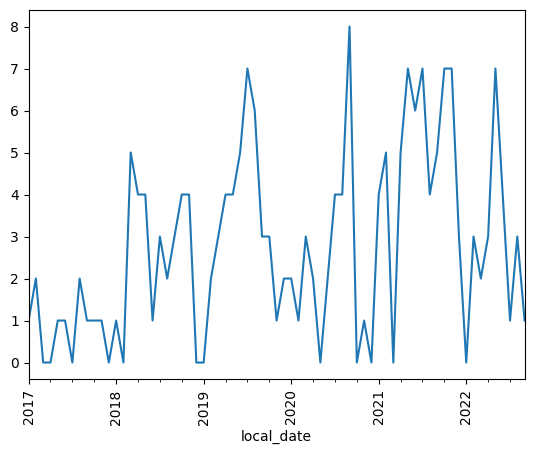

In [7]:
GPS_interference=GPS_disruption_data[GPS_disruption_data['Cause'].str.contains('Interference')]

GPS_interference.resample('M', on='local_date').count()['Disruption Date/Time'].plot(rot=90)


<AxesSubplot: title={'center': 'Entries about Interference'}, ylabel='coalesced_country'>

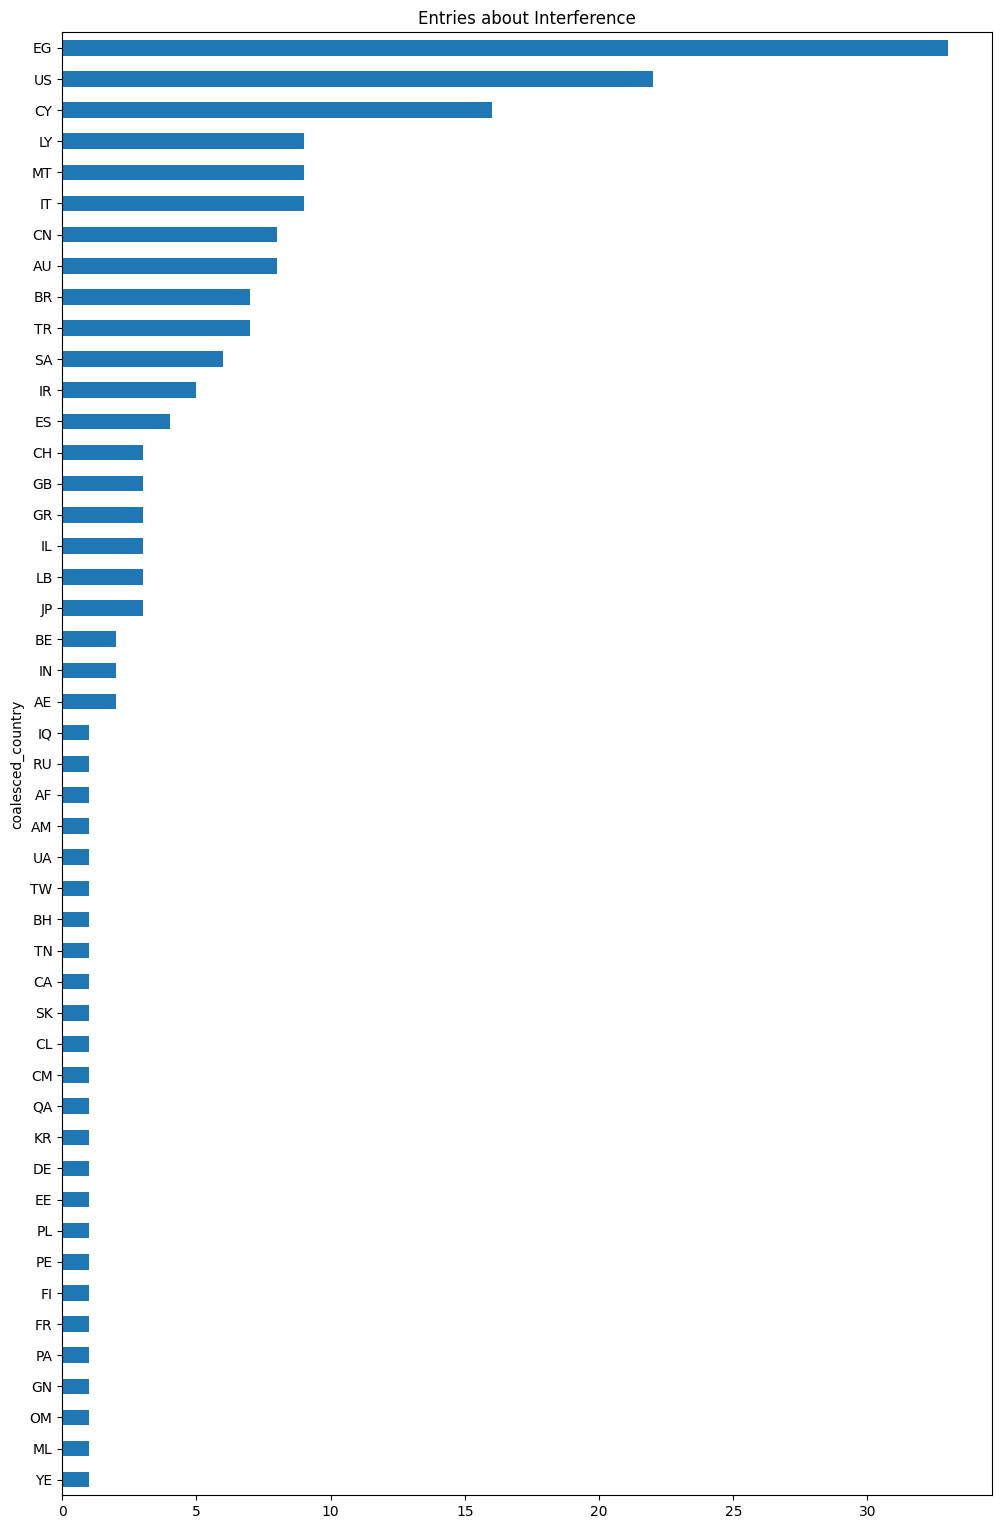

In [8]:
GPS_interference.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19],title='Entries about Interference')

In [9]:
jammmer_effect=pd.concat([pd.DataFrame({'Source':'Syria','destination':'CY'},index=[0]), pd.DataFrame({'Source':'Libya','destination':'MT'},index=[1]),\
pd.DataFrame({'Source':'Libya','destination':'IT'},index=[2]),pd.DataFrame({'Source':'Libya','destination':'LY'},index=[3])])



In [10]:
jammmer_effect

,Source,destination
0,Syria,CY
1,Libya,MT
2,Libya,IT
3,Libya,LY


## Results

In [11]:
GPS_interference_assigned=pd.merge(GPS_interference,jammmer_effect,left_on='coalesced_country', right_on='destination')


<AxesSubplot: xlabel='local_date'>

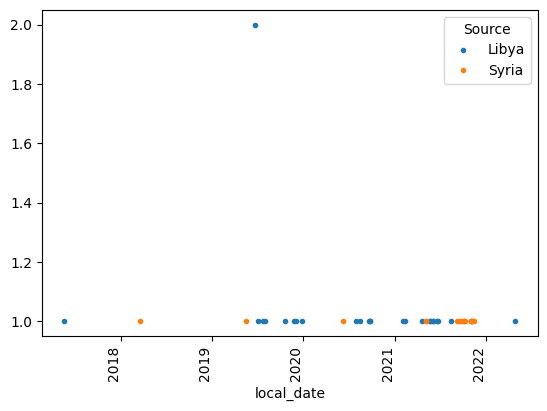

In [12]:
GPS_interference_assigned.groupby(['Source','local_date']).count()['Cause'].unstack().transpose().plot(rot=90,ls='',marker='.')

Syria
Libya


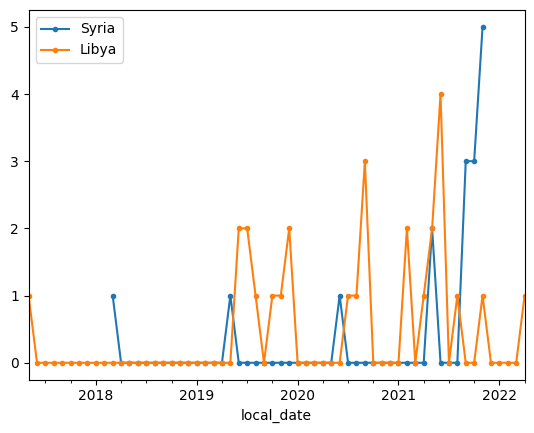

In [13]:
for source_country in jammmer_effect['Source'].unique():
    print(source_country)
    GPS_interference_assigned[GPS_interference_assigned['Source']==source_country].rename(columns={'Disruption Date/Time':source_country}).resample('M', on='local_date').count()[source_country].plot(marker='.').legend()


## Discussion

## References

Anadolu Agency (31 October 2019) [Libya: Haftar forces attack Misrata Air College. College bombed five times by unmanned aerial vehicles, says source with GNA forces.](https://www.aa.com.tr/en/africa/libya-haftar-forces-attack-misrata-air-college/1631348)

Murrian, M. J. , Narula, L. , Iannucci, P. A. , Budzien, S., O'Hanlon, B. W., Psiaki, M. L. and Humphreys, T. E. (2021) First results from three years of GNSS interference monitoring from low Earth orbit, volume 68, number 4 

Government Office for Science (2018) Satellite-derived Time and Position: A Study of Critical Dependencies

Eurocontrol Aviation Intelligence Unit, Think Paper #9 (2021) [Does Radio Frequency Interference to Satellite Navigation pose an increasing threat to Network efficiency, cost-effectiveness and ultimately safety?](https://www.eurocontrol.int/publication/eurocontrol-think-paper-9-radio-frequency-interference-satellite-navigation-active)

Berz G. EUROCONTROL (2022) [Monitoring GNSS RF Interference, NM User Forum, Monitoring CNS Infrastructure Performance](https://www.eurocontrol.int/sites/default/files/2022-02/eurocontrol-nm-user-forum-gerhard-berz.pdf)
  

Ofcom (2022) [Ofcom Website > Spectrum > Spectrum information > GPS jamming exercises](https://web.archive.org/web/20220121015758/https://www.ofcom.org.uk/spectrum/information/gps-jamming-exercises)